In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set_style('dark')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

<h3>Read Data and discover its info</h3>

In [2]:
# Read Data
data = pd.read_csv('../data/Clean_Dataset.csv',index_col=0)

# Show first 5 Rows from data.
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
# Check data dimensions.
# We have 300153 records with 10 independent variables and one dependent variable (price).
data.shape

(300153, 11)

In [4]:
#Check if data attributes have any NA values
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
numericCols = data.select_dtypes(include=["float64","int64"]).columns     # Numerical data attributes --> duration and days left columns
categoricalCols = data.select_dtypes(include="object").columns  # Categorical daata attributes

# We can notice that almost all data attributes are categorical not numerical.
print(numericCols)
print(categoricalCols)


Index(['duration', 'days_left', 'price'], dtype='object')
Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')


In [6]:
# Check number of unique values in each categorical attribute to see if we can convert them into numerical.
# Only flight attribute has many different values 1561, but we can ignore it because the flight number can't affect the price.
for col in categoricalCols:
    print(f"{col}: {data[col].nunique()}")

# Remove flight column
data.drop('flight',axis=1,inplace=True)


airline: 6
flight: 1561
source_city: 6
departure_time: 6
stops: 3
arrival_time: 6
destination_city: 6
class: 2


In [7]:
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<h3>Visualize Data Correlations</h3>

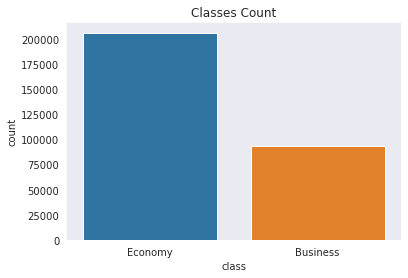

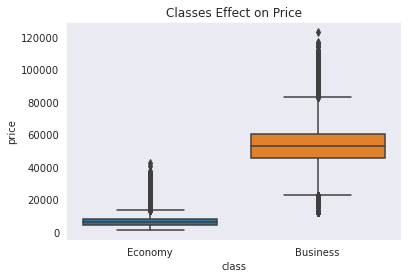

In [8]:
# See counts of each class in dataset.
plt.figure()
plt.title("Classes Count")
sns.countplot(x='class',data=data)
plt.show()
# We can see that the business class has more average price than economy class. And has some outliers.
plt.figure()
plt.title("Classes Effect on Price")
sns.boxplot(x=data['class'], y=data['price'])
plt.show()

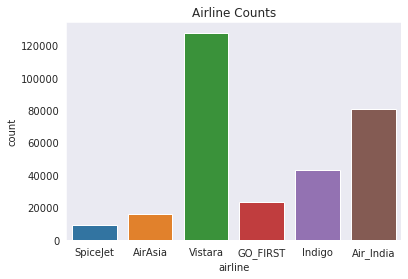

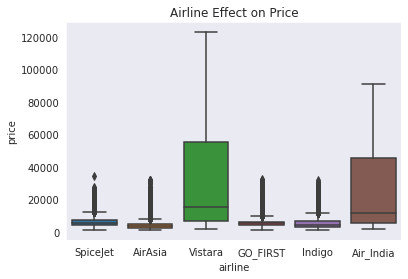

In [9]:
# See counts of each airline category in dataset.
plt.figure()
plt.title("Airline Counts")
sns.countplot(x='airline',data=data)
plt.show()
# We can see that Vistara and Air_India have highest price, but it can be because of the high count of those two airline. And they have no outliers.
plt.figure()
plt.title("Airline Effect on Price")
sns.boxplot(x=data['airline'], y=data['price'])
plt.show()

<AxesSubplot:xlabel='price', ylabel='Count'>

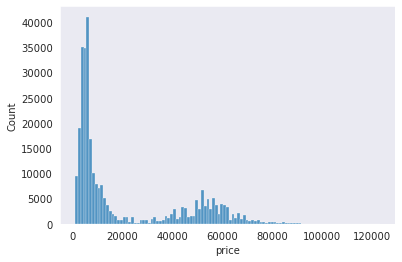

In [10]:
# See price values distribution in data we can notice that by increasing the price, the count of flights decreases.
sns.histplot(data, x="price")

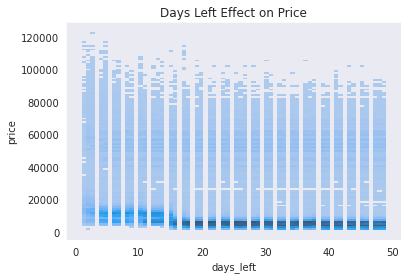

In [11]:
# After plotting the relation between days_left and price.
# we notice that when reserving a flight with low days_left it increases the price and when reserving a flight with high days_left it decreases the flight.
plt.figure()
plt.title("Days Left Effect on Price")
sns.histplot(x=data['days_left'], y=data['price'])
plt.show()

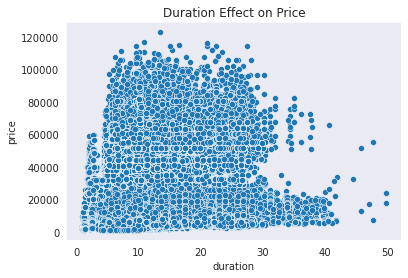

In [12]:
# After plotting the relation between duration and price.
# we notice that duration and price are not very correlated.
plt.title("Duration Effect on Price")
sns.scatterplot(x=data['duration'], y=data['price'])
plt.show()

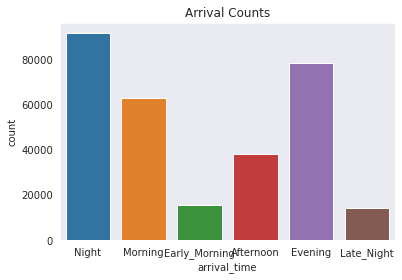

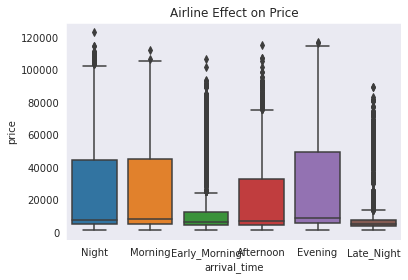

In [13]:
# See counts of each arrival time in dataset.
plt.figure()
plt.title("Arrival Counts")
sns.countplot(x='arrival_time',data=data)
plt.show()
# We can see that Late night and early morning have less price average. And has some outliers.
plt.figure()
plt.title("Airline Effect on Price")
sns.boxplot(x=data['arrival_time'], y=data['price'])
plt.show()

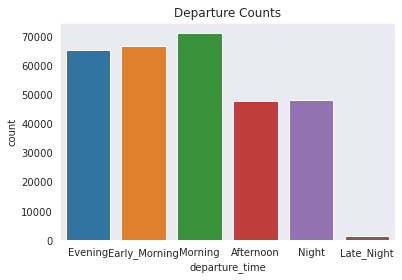

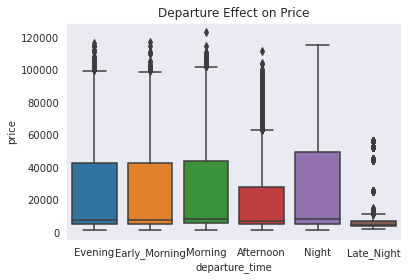

In [14]:
# See counts of each departure time in dataset.
plt.figure()
plt.title("Departure Counts")
sns.countplot(x='departure_time',data=data)
plt.show()
# We can see that Late night time has the least price and count of flights. And has some outliers.
plt.figure()
plt.title("Departure Effect on Price")
sns.boxplot(x=data['departure_time'], y=data['price'])
plt.show()

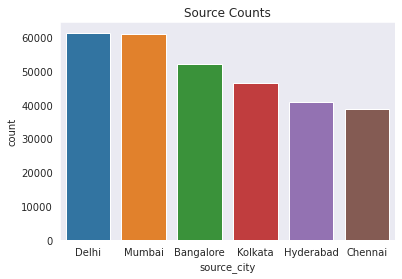

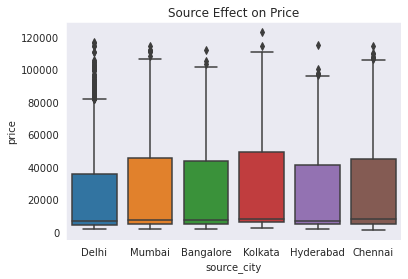

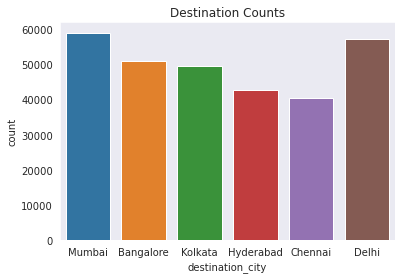

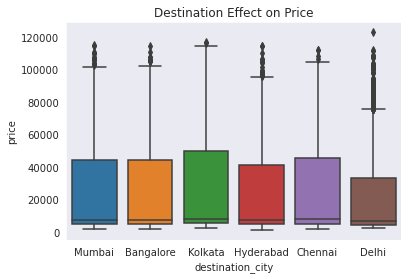

In [15]:
# See counts of each Source in dataset.
plt.figure()
plt.title("Source Counts")
sns.countplot(x='source_city',data=data)
plt.show()
# We can see that source city and price is not correlated.
plt.figure()
plt.title("Source Effect on Price")
sns.boxplot(x=data['source_city'], y=data['price'])
plt.show()
# See counts of each departure time in dataset.
plt.figure()
plt.title("Destination Counts")
sns.countplot(x='destination_city',data=data)
plt.show()
# We can see that destination city and price is not correlated.
plt.figure()
plt.title("Destination Effect on Price")
sns.boxplot(x=data['destination_city'], y=data['price'])
plt.show()

# We notice that delhi has some outliers data.
# But what about source Destination pairs ?!

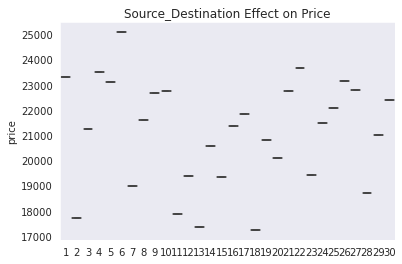

In [16]:
# Create Pairs of source and destination.
CombinedData = data.groupby(['source_city', 'destination_city'])['price'].mean()
CombinedData = CombinedData.reset_index()
x = list(range(1,len(CombinedData)+1))
# We can see that The source_destination pairs can tell somthing about price.
plt.figure()
plt.title("Source_Destination Effect on Price")
sns.boxplot(x=x, y=CombinedData['price'])
plt.show()

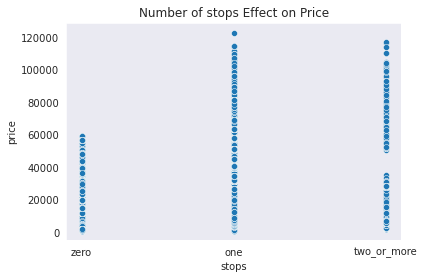

In [17]:
# After plotting the relation between stops and price.
# we notice that flights with zero stops has less price than others.
plt.title("Number of stops Effect on Price")
sns.scatterplot(x=data['stops'], y=data['price'])
plt.show()

<h3>Converting Categorical Attribute To Numerical values</h3>

In [18]:
# Convert class attribute
data['class'].replace(['Economy', 'Business'],[0, 1], inplace=True)
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,0,2.33,1,5955


In [19]:
# Convert stops attribute
data['stops'].replace(['zero', 'one','two_or_more'],[0, 1,2], inplace=True)
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


In [20]:
# Convert airline

# Create columns with all possible categories having 1 in the right value and 0 otherwise.
dummies = pd.get_dummies(data['airline'])   
# Append these columns into dataset
data = pd.concat([data, dummies], axis=1)
# Remove the original column
data = data.drop('airline',axis=1)
data.head()

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953,0,0,0,0,1,0
1,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953,0,0,0,0,1,0
2,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956,1,0,0,0,0,0
3,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955,0,0,0,0,0,1
4,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955,0,0,0,0,0,1


In [21]:
# Convert Source city
data['source_city'] += '_source'

# Create columns with all possible categories having 1 in the right value and 0 otherwise.
dummies = pd.get_dummies(data['source_city'])   
# Append these columns into dataset
data = pd.concat([data, dummies], axis=1)
# Remove the original column
data = data.drop('source_city',axis=1)
data.head()

,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,Bangalore_source,Chennai_source,Delhi_source,Hyderabad_source,Kolkata_source,Mumbai_source
0,Evening,0,Night,Mumbai,0,2.17,1,5953,0,0,0,0,1,0,0,0,1,0,0,0
1,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953,0,0,0,0,1,0,0,0,1,0,0,0
2,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956,1,0,0,0,0,0,0,0,1,0,0,0
3,Morning,0,Afternoon,Mumbai,0,2.25,1,5955,0,0,0,0,0,1,0,0,1,0,0,0
4,Morning,0,Morning,Mumbai,0,2.33,1,5955,0,0,0,0,0,1,0,0,1,0,0,0


In [22]:
# Convert Destination city
data['destination_city'] += '_destination'

# Create columns with all possible categories having 1 in the right value and 0 otherwise.
dummies = pd.get_dummies(data['destination_city'])   
# Append these columns into dataset
data = pd.concat([data, dummies], axis=1)
# Remove the original column
data = data.drop('destination_city',axis=1)
data.head()

,departure_time,stops,arrival_time,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,...,Delhi_source,Hyderabad_source,Kolkata_source,Mumbai_source,Bangalore_destination,Chennai_destination,Delhi_destination,Hyderabad_destination,Kolkata_destination,Mumbai_destination
0,Evening,0,Night,0,2.17,1,5953,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,Early_Morning,0,Morning,0,2.33,1,5953,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,Early_Morning,0,Early_Morning,0,2.17,1,5956,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,Morning,0,Afternoon,0,2.25,1,5955,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,Morning,0,Morning,0,2.33,1,5955,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [23]:
# Convert departure time
data['departure_time'] += '_departure'

# Create columns with all possible categories having 1 in the right value and 0 otherwise.
dummies = pd.get_dummies(data['departure_time'])   
# Append these columns into dataset
data = pd.concat([data, dummies], axis=1)
# Remove the original column
data = data.drop('departure_time',axis=1)
data.head()

,stops,arrival_time,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,...,Delhi_destination,Hyderabad_destination,Kolkata_destination,Mumbai_destination,Afternoon_departure,Early_Morning_departure,Evening_departure,Late_Night_departure,Morning_departure,Night_departure
0,0,Night,0,2.17,1,5953,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,Morning,0,2.33,1,5953,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,Early_Morning,0,2.17,1,5956,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,Afternoon,0,2.25,1,5955,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,Morning,0,2.33,1,5955,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [24]:
# Convert departure time
data['arrival_time'] += '_arrival'

# Create columns with all possible categories having 1 in the right value and 0 otherwise.
dummies = pd.get_dummies(data['arrival_time'])   
# Append these columns into dataset
data = pd.concat([data, dummies], axis=1)
# Remove the original column
data = data.drop('arrival_time',axis=1)
data.head()

,stops,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,...,Evening_departure,Late_Night_departure,Morning_departure,Night_departure,Afternoon_arrival,Early_Morning_arrival,Evening_arrival,Late_Night_arrival,Morning_arrival,Night_arrival
0,0,0,2.17,1,5953,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [25]:
data.shape
# Now We have 35 Numerical feature.

(300153, 35)

<h3>Training and Model building</h3>

In [26]:
# Split independent and dependent variables
NewData = data
y = NewData['price']
x = data.drop('price',axis=1)

# Try to remove duration, source_city and destination city from features, because they have many outliers but it decreases accuracy to 90%.
# x=x.drop(['duration','Bangalore_destination',	'Chennai_destination','Delhi_destination','Hyderabad_destination',	'Kolkata_destination',	'Mumbai_destination','Bangalore_source',	'Chennai_source',	'Delhi_source',	'Hyderabad_source',	'Kolkata_source',	'Mumbai_source'],axis=1)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=8)

x.shape
x.head()

,stops,class,duration,days_left,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,...,Evening_departure,Late_Night_departure,Morning_departure,Night_departure,Afternoon_arrival,Early_Morning_arrival,Evening_arrival,Late_Night_arrival,Morning_arrival,Night_arrival
0,0,0,2.17,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,2.33,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.17,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,0,0,2.33,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [27]:
#Apply Linear regression 
LM = LinearRegression()
LM.fit(X_train, y_train)

LinearRegression()

In [28]:
accuracy = LM.score(X_test, y_test)
accuracy

0.9109473807822858

In [29]:
y_predict = LM.predict(X_test)

In [30]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)



In [31]:
print('RMSE =',RMSE, '\nMSE =',MSE, '\nR2 =', round(r2,4)) 

RMSE = 6768.606 
MSE = 45814031.40938393 
R2 = 0.9109


In [32]:
# Export preprocessed training data for map reduce training
mr_X_train = X_train.copy()
mr_X_train.insert(0, "bias", 1)

preprocessed_data = pd.concat([mr_X_train, y_train], axis=1)

preprocessed_data.to_csv("../data/preprocessed_train_data.csv",
                         sep=',', header=False, index=False)

In [33]:
# Export preprocessed training data for map reduce training
mr_X_test = X_test.copy()
mr_X_test.insert(0, "bias", 1)

preprocessed_data = pd.concat([mr_X_test, y_test], axis=1)

preprocessed_data.to_csv("../data/preprocessed_test_data.csv",
                         sep=',', header=False, index=False)

In [34]:
# Testing the model trained using map reduce
mr_params = np.genfromtxt("./model.txt")
mr_model = LinearRegression()
mr_model.intercept_ = mr_params[0]
mr_model.coef_ = mr_params[1:]

mr_model.score(X_test, y_test)

0.9109455549784616